In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

heartdisease_df = pd.read_csv('heart.csv')
heartdisease_df.drop([0], axis=0, inplace=True)
heartdisease_df.shape   #152 ye 151 ayrılarak hata verdiği için 0. satırı sildim.

X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [2]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [4]:
clusters = gmm_cluster.fit_predict(X_std)

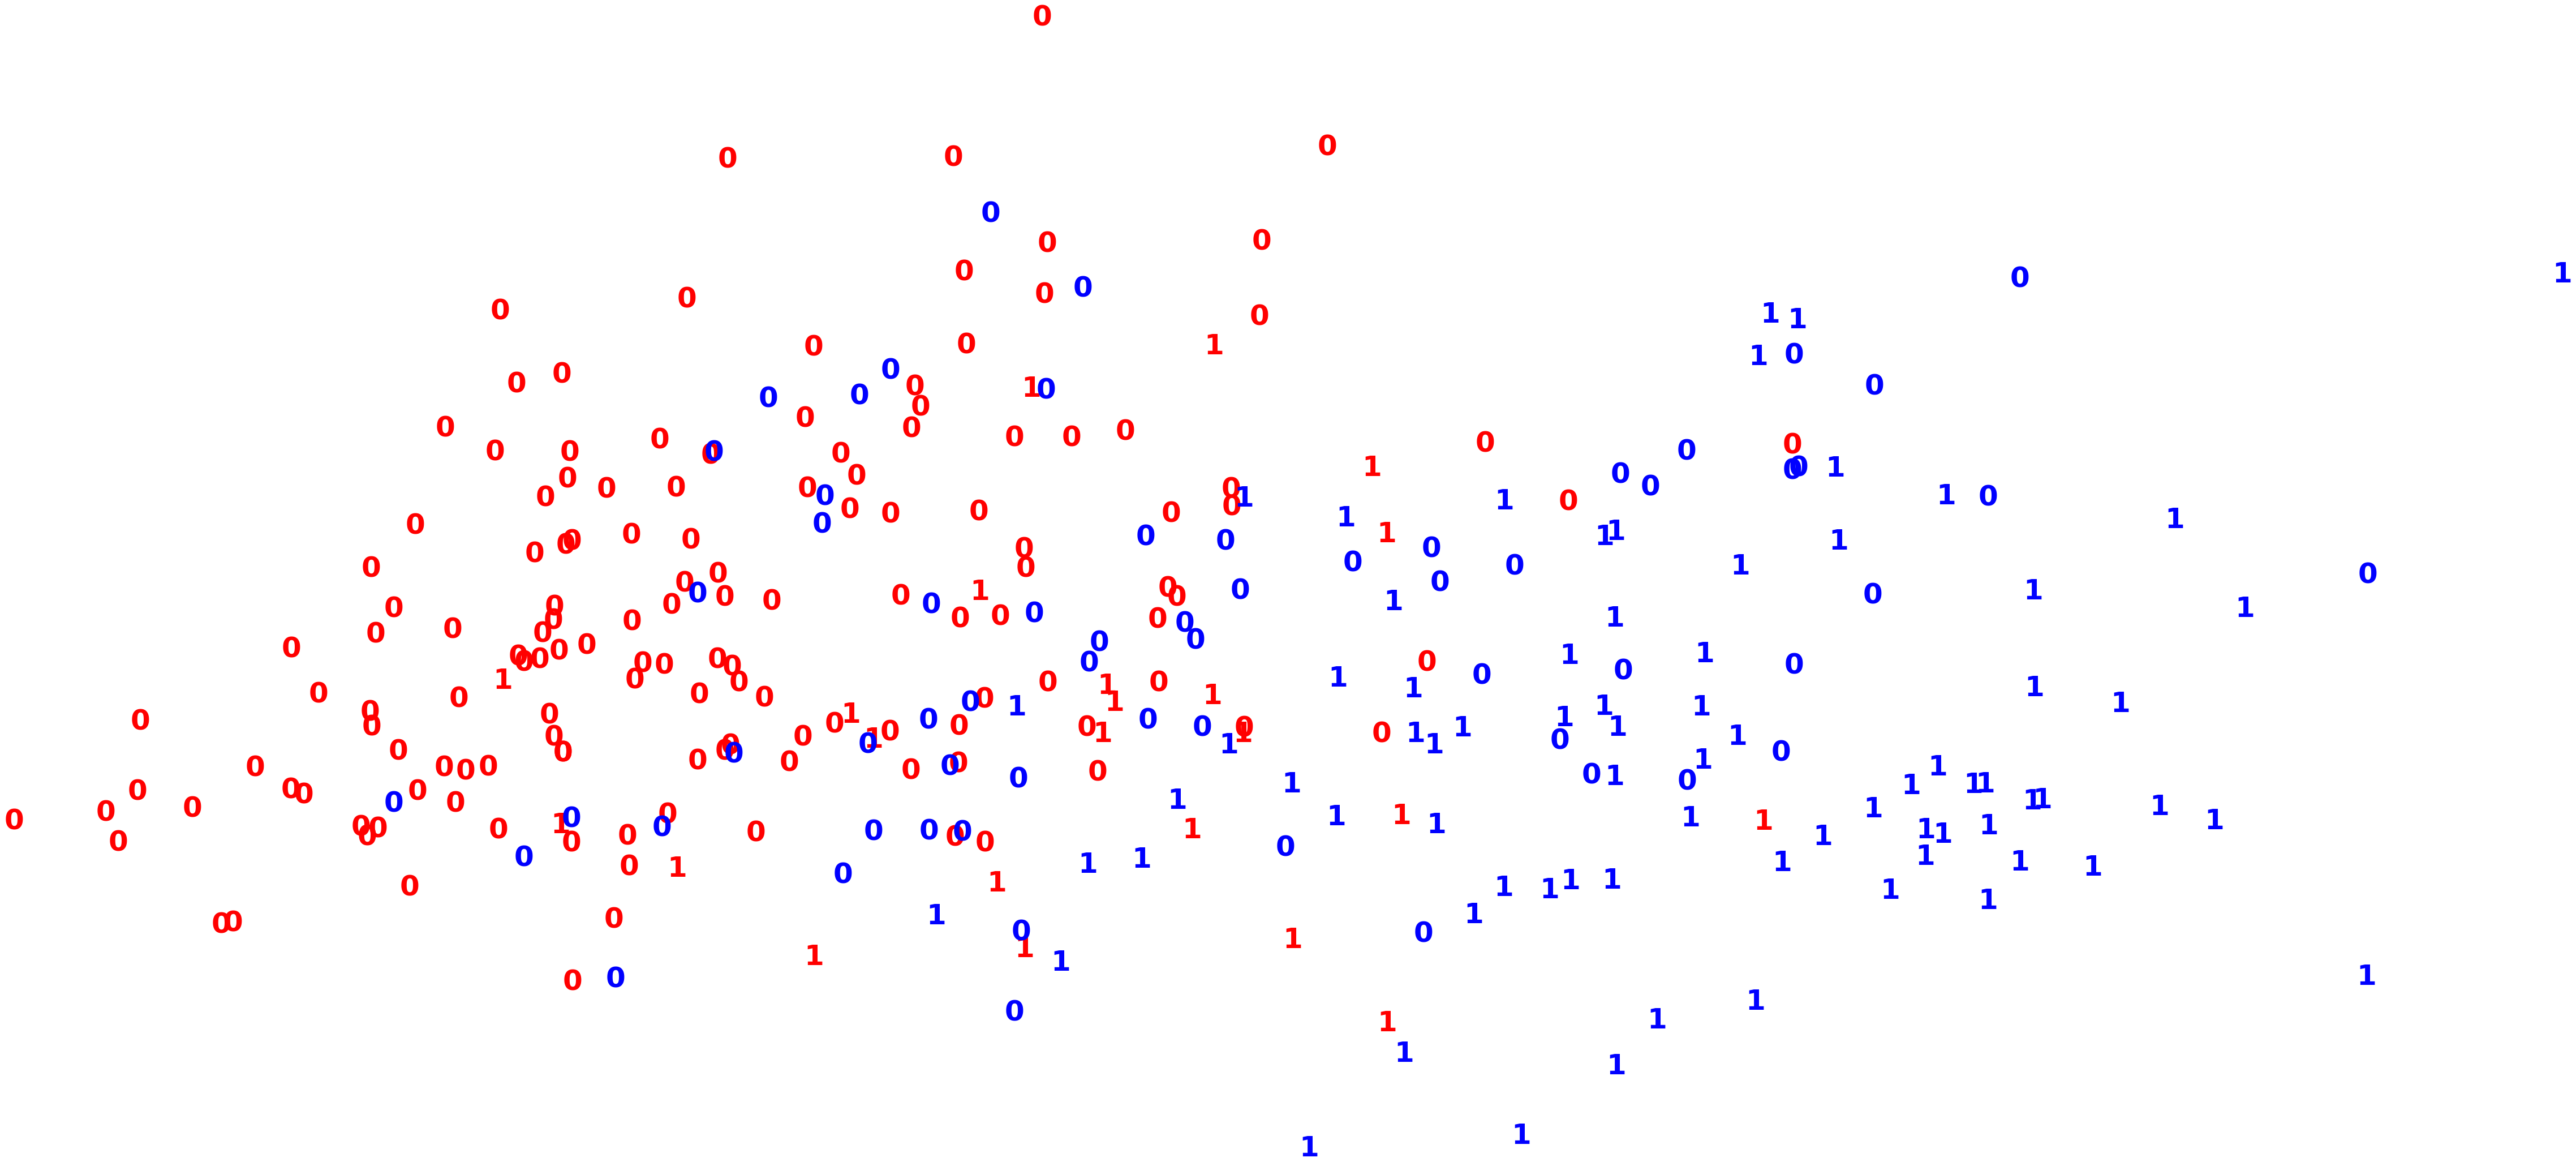

In [5]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**DBSCAN hiç iyi ayıramazken KMeans ve GMM ciddi miktarda iyi ayırdı. Bir de ARI ve Siluet skorlarına bakalım.**

In [7]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI: 0.188
GMM çözümünün siluet skoru 0.13592603064120456


**Diğer algoritmaların sonuçları;**

**KMeans** için ; **ARI** : 0.385 , **Siluet Skor** : 0.169

**DBSCAN** için ; **ARI** : 0.020 , **Siluet Skor** : 0.048

Üç sonucu karşılaştırdığımızda en iyi skoru KMeans, en kötü skoru DBSCAN'in verdiği görülmekte.

-------------------------------------------------------------------------------------

**covariance_type parametresini değiştirerek sonuçların nasıl değiştiğine bakalım.**

In [12]:
gmm_cluster_tied = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'tied' )

In [13]:
clusters_tied = gmm_cluster_tied.fit_predict(X_std)

In [14]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_tied)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_tied, metric='euclidean')))

ARI: 0.188
GMM çözümünün siluet skoru 0.13592603064120456


In [16]:
gmm_cluster_diag = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'diag' )

In [17]:
clusters_diag = gmm_cluster_diag.fit_predict(X_std)

In [18]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_diag)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_diag, metric='euclidean')))

ARI: 0.188
GMM çözümünün siluet skoru 0.13592603064120456


In [19]:
gmm_cluster_spherical = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'spherical' )

In [20]:
clusters_spherical= gmm_cluster_spherical.fit_predict(X_std)

In [21]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_spherical)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_spherical, metric='euclidean')))

ARI: 0.177
GMM çözümünün siluet skoru 0.10720092445633936


**Default olarak da 'full' kullanılmıştır. Hepsinin sonucuna baktığımızda spherical hariç aynı sonuçları verdiğini görmekteyiz. spherical onlardan daha düşük bir skor vermiştir.**